In [1]:
pwd()
using Pkg; Pkg.activate("../../../FermiCG/")
using FermiCG, NPZ, JLD2
using Plots
using PyCall
using Printf

readdir()

  Activating environment at `~/code/FermiCG/Project.toml`


2-element Vector{String}:
 ".ipynb_checkpoints"
 "ccsd_scan.ipynb"

In [2]:
molecule = "
He        -0.00000       -0.84718       -2.53002
He         0.00000        0.84718       -2.53002
He         0.00000        0.84724       -0.84099
He        -0.00000       -0.84724       -0.84099
He        -0.00000       -0.84724        0.84099
He         0.00000        0.84724        0.84099
He         0.00000        0.84718        2.53002
He        -0.00000       -0.84718        2.53002
"
atoms = []
for (li,line) in enumerate(split(rstrip(lstrip(molecule)), "\n"))
    l = split(line)
    push!(atoms, Atom(li, l[1], parse.(Float64,l[2:4])))
end

basis = "aug-cc-pvdz"
# 
# Create FermiCG.Molecule type
mol     = Molecule(0, 1, atoms,basis);


pyscf = pyimport("pyscf")
# pyscf.lib.num_threads(1)


pymol = pyscf.gto.Mole(atom=molecule,
    symmetry = false, spin =0,charge=0,
    basis = basis)

pymol.build()
mf = pyscf.scf.RHF(pymol)
mf.verbose = 4
mf.conv_tol = 1e-8
mf.conv_tol_grad = 1e-5
mf.run(max_cycle=200)

rdm_mf = mf.make_rdm1()

@printf(" Hartree-Fock Energy: %12.8f", mf.e_tot)
pyscfcc = pyimport("pyscf.cc")

mycc = pyscfcc.CCSD(mf).run()
@printf("CCSD total energy    %12.8f\n", mycc.e_tot)
et = mycc.ccsd_t()
@printf("CCSD(T) total energy %12.8f\n", mycc.e_tot + et)




******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-08
SCF conv_tol_grad = 1e-05
SCF max_cycles = 200
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /var/folders/td/qpnnxwv93pq0t7bbdkh5rvzr0000gn/T/tmpht5iuggd
max_memory 4000 MB (current use 0 MB)
init E= -22.9951730591146
  HOMO = -0.730393014975686  LUMO = 0.186669057411609
cycle= 1 E= -22.7595136272455  delta_E= 0.236  |g|= 0.038  |ddm|= 0.569
  HOMO = -0.796610333208952  LUMO = 0.187618962618204
cycle= 2 E= -22.759928536848  delta_E= -0.000415  |g|= 0.00669  |ddm|= 0.0407
  HOMO = -0.796712334926505  LUMO = 0.187659531682966
cycle= 3 E= -22.7599440737373  delta_E= -1.55e-05  |g|= 0.000221  |ddm|= 0.00943
  HOMO = -0.79667842227853  LUMO = 0.187660787604997
cycle= 4 E= -22.7599440913032  delta_E= -1.76e-08  |g|= 1.94e-05  |ddm|= 0.000474
  HOMO = -0

    8

    He      -0.0000000000000000      -0.8895390000000001      -2.6565210000000001 
    He       0.0000000000000000       0.8895390000000001      -2.6565210000000001 
    He       0.0000000000000000       0.8896020000000000      -0.8830395000000001 
    He      -0.0000000000000000      -0.8896020000000000      -0.8830395000000001 
    He      -0.0000000000000000      -0.8896020000000000       0.8830395000000001 
    He       0.0000000000000000       0.8896020000000000       0.8830395000000001 
    He       0.0000000000000000       0.8895390000000001       2.6565210000000001 
    He      -0.0000000000000000      -0.8895390000000001       2.6565210000000001 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-08
SCF conv_tol_grad = 1e-08
SCF max_cycles = 200
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF r

 Hartree-Fock Energy: -22.82615487E(CCSD) = -23.09989552287524  E_corr = -0.2737406541276882
CCSD total energy    -23.09989552
CCSD(T) correction = -0.000225108375646912
CCSD(T) total energy -23.10012063
    8

    He      -0.0000000000000000      -1.0589750000000000      -3.1625250000000000 
    He       0.0000000000000000       1.0589750000000000      -3.1625250000000000 
    He       0.0000000000000000       1.0590500000000000      -1.0512375000000000 
    He      -0.0000000000000000      -1.0590500000000000      -1.0512375000000000 
    He      -0.0000000000000000      -1.0590500000000000       1.0512375000000000 
    He       0.0000000000000000       1.0590500000000000       1.0512375000000000 
    He       0.0000000000000000       1.0589750000000000       3.1625250000000000 
    He      -0.0000000000000000      -1.0589750000000000       3.1625250000000000 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0


 Hartree-Fock Energy: -22.84138036E(CCSD) = -23.11381974813893  E_corr = -0.2724393893429645
CCSD total energy    -23.11381975
CCSD(T) correction = -0.000109473429129671
CCSD(T) total energy -23.11392922
    8

    He      -0.0000000000000000      -1.2284109999999999      -3.6685289999999999 
    He       0.0000000000000000       1.2284109999999999      -3.6685289999999999 
    He       0.0000000000000000       1.2284979999999999      -1.2194354999999999 
    He      -0.0000000000000000      -1.2284979999999999      -1.2194354999999999 
    He      -0.0000000000000000      -1.2284979999999999       1.2194354999999999 
    He       0.0000000000000000       1.2284979999999999       1.2194354999999999 
    He       0.0000000000000000       1.2284109999999999       3.6685289999999999 
    He      -0.0000000000000000      -1.2284109999999999       3.6685289999999999 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0


 Hartree-Fock Energy: -22.84486934E(CCSD) = -23.1165655737698  E_corr = -0.2716962360567052
CCSD total energy    -23.11656557
CCSD(T) correction = -5.25500607609423e-05
CCSD(T) total energy -23.11661812
    8

    He      -0.0000000000000000      -1.3978470000000001      -4.1745329999999994 
    He       0.0000000000000000       1.3978470000000001      -4.1745329999999994 
    He       0.0000000000000000       1.3979459999999999      -1.3876335000000000 
    He      -0.0000000000000000      -1.3979459999999999      -1.3876335000000000 
    He      -0.0000000000000000      -1.3979459999999999       1.3876335000000000 
    He       0.0000000000000000       1.3979459999999999       1.3876335000000000 
    He       0.0000000000000000       1.3978470000000001       4.1745329999999994 
    He      -0.0000000000000000      -1.3978470000000001       4.1745329999999994 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
D

 Hartree-Fock Energy: -22.84558888E(CCSD) = -23.11685869136292  E_corr = -0.2712698091055361
CCSD total energy    -23.11685869
CCSD(T) correction = -2.59927982417761e-05
CCSD(T) total energy -23.11688468
    8

    He      -0.0000000000000000      -1.5672830000000002      -4.6805370000000002 
    He       0.0000000000000000       1.5672830000000002      -4.6805370000000002 
    He       0.0000000000000000       1.5673940000000000      -1.5558315000000000 
    He      -0.0000000000000000      -1.5673940000000000      -1.5558315000000000 
    He      -0.0000000000000000      -1.5673940000000000       1.5558315000000000 
    He       0.0000000000000000       1.5673940000000000       1.5558315000000000 
    He       0.0000000000000000       1.5672830000000002       4.6805370000000002 
    He      -0.0000000000000000      -1.5672830000000002       4.6805370000000002 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0


 Hartree-Fock Energy: -22.84566203E(CCSD) = -23.11670376549102  E_corr = -0.2710417394228329
CCSD total energy    -23.11670377
CCSD(T) correction = -1.35866001773907e-05
CCSD(T) total energy -23.11671735
    8

    He      -0.0000000000000000      -1.7367189999999999      -5.1865409999999992 
    He       0.0000000000000000       1.7367189999999999      -5.1865409999999992 
    He       0.0000000000000000       1.7368419999999998      -1.7240294999999999 
    He      -0.0000000000000000      -1.7368419999999998      -1.7240294999999999 
    He      -0.0000000000000000      -1.7368419999999998       1.7240294999999999 
    He       0.0000000000000000       1.7368419999999998       1.7240294999999999 
    He       0.0000000000000000       1.7367189999999999       5.1865409999999992 
    He      -0.0000000000000000      -1.7367189999999999       5.1865409999999992 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0


 Hartree-Fock Energy: -22.84564951E(CCSD) = -23.11656986849797  E_corr = -0.2709203601196689
CCSD total energy    -23.11656987
CCSD(T) correction = -7.54889276155722e-06
CCSD(T) total energy -23.11657742
    8

    He      -0.0000000000000000      -1.9061550000000000      -5.6925450000000000 
    He       0.0000000000000000       1.9061550000000000      -5.6925450000000000 
    He       0.0000000000000000       1.9062900000000000      -1.8922275000000000 
    He      -0.0000000000000000      -1.9062900000000000      -1.8922275000000000 
    He      -0.0000000000000000      -1.9062900000000000       1.8922275000000000 
    He       0.0000000000000000       1.9062900000000000       1.8922275000000000 
    He       0.0000000000000000       1.9061550000000000       5.6925450000000000 
    He      -0.0000000000000000      -1.9061550000000000       5.6925450000000000 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0


 Hartree-Fock Energy: -22.84564246E(CCSD) = -23.11649424689839  E_corr = -0.2708517866998992
CCSD total energy    -23.11649425
CCSD(T) correction = -4.43192481528056e-06
CCSD(T) total energy -23.11649868
    8

    He      -0.0000000000000000      -2.0755910000000002      -6.1985489999999999 
    He       0.0000000000000000       2.0755910000000002      -6.1985489999999999 
    He       0.0000000000000000       2.0757380000000003      -2.0604255000000000 
    He      -0.0000000000000000      -2.0757380000000003      -2.0604255000000000 
    He      -0.0000000000000000      -2.0757380000000003       2.0604255000000000 
    He       0.0000000000000000       2.0757380000000003       2.0604255000000000 
    He       0.0000000000000000       2.0755910000000002       6.1985489999999999 
    He      -0.0000000000000000      -2.0755910000000002       6.1985489999999999 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0


 Hartree-Fock Energy: -22.84563951E(CCSD) = -23.11645104857778  E_corr = -0.2708115406478719
CCSD total energy    -23.11645105
CCSD(T) correction = -2.72463764262887e-06
CCSD(T) total energy -23.11645377
    8

    He      -0.0000000000000000      -2.2450270000000003      -6.7045530000000007 
    He       0.0000000000000000       2.2450270000000003      -6.7045530000000007 
    He       0.0000000000000000       2.2451860000000003      -2.2286235000000003 
    He      -0.0000000000000000      -2.2451860000000003      -2.2286235000000003 
    He      -0.0000000000000000      -2.2451860000000003       2.2286235000000003 
    He       0.0000000000000000       2.2451860000000003       2.2286235000000003 
    He       0.0000000000000000       2.2450270000000003       6.7045530000000007 
    He      -0.0000000000000000      -2.2450270000000003       6.7045530000000007 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0


 Hartree-Fock Energy: -22.84563818E(CCSD) = -23.11642596380719  E_corr = -0.2707877849271908
CCSD total energy    -23.11642596
CCSD(T) correction = -1.74026706079427e-06
CCSD(T) total energy -23.11642770
    8

    He      -0.0000000000000000      -2.4144630000000000      -7.2105569999999997 
    He       0.0000000000000000       2.4144630000000000      -7.2105569999999997 
    He       0.0000000000000000       2.4146339999999999      -2.3968215000000002 
    He      -0.0000000000000000      -2.4146339999999999      -2.3968215000000002 
    He      -0.0000000000000000      -2.4146339999999999       2.3968215000000002 
    He       0.0000000000000000       2.4146339999999999       2.3968215000000002 
    He       0.0000000000000000       2.4144630000000000       7.2105569999999997 
    He      -0.0000000000000000      -2.4144630000000000       7.2105569999999997 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0


 Hartree-Fock Energy: -22.84563775E(CCSD) = -23.11641149799217  E_corr = -0.2707737435069981
CCSD total energy    -23.11641150
CCSD(T) correction = -1.14789429969415e-06
CCSD(T) total energy -23.11641265


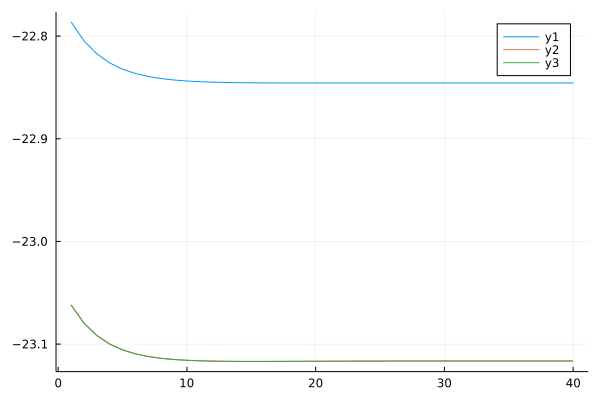

In [3]:
n_steps = 40
step_size = .05

pymol_init = pyscf.gto.Mole(atom=molecule,
    symmetry = false, spin =0,charge=0,
    basis = basis)
pymol.build()


io = open("traj.xyz", "w");
energies_scf = []
energies_ccsd = []
energies_ccsdt = []

for R in 1:n_steps

    pymol = deepcopy(pymol_init)
    scale = 1+R*step_size

    xyz = @sprintf("%5i\n\n", length(mol.atoms))
    tmp = []
    for a in mol.atoms
        push!(tmp, ["He", (a.xyz[1]*scale, a.xyz[2]*scale, a.xyz[3]*scale)])
        xyz = xyz * @sprintf("%6s %24.16f %24.16f %24.16f \n", a.symbol, a.xyz[1]*scale, a.xyz[2]*scale, a.xyz[3]*scale)
    end
    pymol.atom = tmp
    pymol.build()
    
    
    println(xyz)
    write(io, xyz);
   
    
#     println(pymol.format_atom(1))
    
    #     mol_R = Molecule(0, 1, [a[0]pymol.atom, pymol.basis)


    mf = pyscf.scf.RHF(pymol)
    mf.verbose = 4
    mf.conv_tol = 1e-8
    mf.conv_tol_grad = 1e-8
    mf.run(max_cycle=200)

    rdm_mf = mf.make_rdm1()
    @printf(" Hartree-Fock Energy: %12.8f", mf.e_tot)

    push!(energies_scf, mf.e_tot)
    
    pyscfcc = pyimport("pyscf.cc")

    mycc = pyscfcc.CCSD(mf).run()
    @printf("CCSD total energy    %12.8f\n", mycc.e_tot)
    
    et = mycc.ccsd_t()
    @printf("CCSD(T) total energy %12.8f\n", mycc.e_tot + et)

    
    push!(energies_ccsd, mycc.e_tot)
    push!(energies_ccsdt, mycc.e_tot+et)

end
close(io);
plot([energies_scf, energies_ccsd, energies_ccsdt])

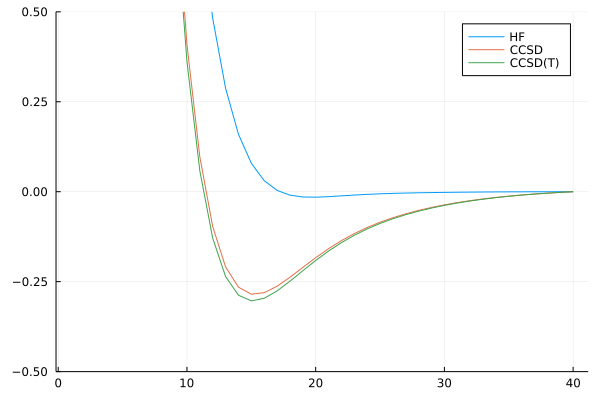

In [4]:
plot([energies_scf.-energies_scf[end], energies_ccsd.-energies_ccsd[end], energies_ccsdt.-energies_ccsdt[end]]*627.51, 
labels = ["HF" "CCSD" "CCSD(T)"])
ylims!((-.5,.5))